In [1]:
# import libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Understanding

## Load the application and previous application file

In [2]:
# load application_data file
app=pd.read_csv("application_data.csv")
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# load previous application_data file
papp=pd.read_csv("previous_application.csv")
papp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## A. Understanding the Application File

In [4]:
app.shape

(307511, 122)

In [5]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## B. Understanding the Previous Application File

In [7]:
papp.shape

(1670214, 37)

In [8]:
papp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [9]:
papp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## C. Understanding Column Strutcure & Values contained in Columns of Application File

In [10]:
((app.isnull().sum()/app.shape[0])*100)>45

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool

In [11]:
colNullMore50=app.columns[((app.isnull().sum()/app.shape[0])*100)>45]

In [12]:
delcol=colNullMore50.tolist()
len(delcol)

49

In [13]:
delcol

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

## D. Understanding Column Strutcure & Value contained in columns of Previous Application File

In [14]:
colNullMore50_prev=papp.columns[((papp.isnull().sum()/papp.shape[0])*100)>50]
delcol_prev=colNullMore50_prev.tolist()
delcol_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [15]:
len(delcol_prev)

4

In [16]:
colOnlyInApp=[]
colCommonAppPre=[]

In [17]:
for col in app.columns:
    if col not in papp.columns:
        colOnlyInApp.append(col)
    else:
        colCommonAppPre.append(col)

In [18]:
len(colOnlyInApp)
len(colCommonAppPre)
colCommonAppPre

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START']

# Data Cleaning and Manipulation

## 1.Handling Nulls in Application File

#### A.Check for columns having null greater than 45% of the total volume in Application File

In [19]:
nullValues=app[app.columns[((app.isnull().sum()/app.shape[0])*100)>45]]
nullValues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   OWN_CAR_AGE                   104582 non-null  float64
 1   EXT_SOURCE_1                  134133 non-null  float64
 2   APARTMENTS_AVG                151450 non-null  float64
 3   BASEMENTAREA_AVG              127568 non-null  float64
 4   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 5   YEARS_BUILD_AVG               103023 non-null  float64
 6   COMMONAREA_AVG                92646 non-null   float64
 7   ELEVATORS_AVG                 143620 non-null  float64
 8   ENTRANCES_AVG                 152683 non-null  float64
 9   FLOORSMAX_AVG                 154491 non-null  float64
 10  FLOORSMIN_AVG                 98869 non-null   float64
 11  LANDAREA_AVG                  124921 non-null  float64
 12  LIVINGAPARTMENTS_AVG          97312 non-null

#### B.Null Value Visualisation Process in Application File

In [20]:
nullValues.FONDKAPREMONT_MODE= np.where(~nullValues.FONDKAPREMONT_MODE.isnull(),1,nullValues.FONDKAPREMONT_MODE)
nullValues.HOUSETYPE_MODE= np.where(~nullValues.HOUSETYPE_MODE.isnull(),1,nullValues.HOUSETYPE_MODE)
nullValues.WALLSMATERIAL_MODE= np.where(~nullValues.WALLSMATERIAL_MODE.isnull(),1,nullValues.WALLSMATERIAL_MODE)
nullValues.EMERGENCYSTATE_MODE= np.where(~nullValues.EMERGENCYSTATE_MODE.isnull(),1,nullValues.EMERGENCYSTATE_MODE)

In [21]:
nullValues.FONDKAPREMONT_MODE= nullValues.FONDKAPREMONT_MODE.astype('float')
nullValues.HOUSETYPE_MODE= nullValues.HOUSETYPE_MODE.astype('float')
nullValues.WALLSMATERIAL_MODE= nullValues.WALLSMATERIAL_MODE.astype('float')
nullValues.EMERGENCYSTATE_MODE= nullValues.EMERGENCYSTATE_MODE.astype('float')

In [22]:
nullValues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   OWN_CAR_AGE                   104582 non-null  float64
 1   EXT_SOURCE_1                  134133 non-null  float64
 2   APARTMENTS_AVG                151450 non-null  float64
 3   BASEMENTAREA_AVG              127568 non-null  float64
 4   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 5   YEARS_BUILD_AVG               103023 non-null  float64
 6   COMMONAREA_AVG                92646 non-null   float64
 7   ELEVATORS_AVG                 143620 non-null  float64
 8   ENTRANCES_AVG                 152683 non-null  float64
 9   FLOORSMAX_AVG                 154491 non-null  float64
 10  FLOORSMIN_AVG                 98869 non-null   float64
 11  LANDAREA_AVG                  124921 non-null  float64
 12  LIVINGAPARTMENTS_AVG          97312 non-null

In [23]:
nullValues[~nullValues.isnull()]=1
nullValues[nullValues.isnull()]=0

In [24]:
nullValues=nullValues.astype('int')

In [25]:
a=nullValues[colNullMore50].apply(pd.Series.value_counts)
a.T

,0,1
OWN_CAR_AGE,202929,104582
EXT_SOURCE_1,173378,134133
APARTMENTS_AVG,156061,151450
BASEMENTAREA_AVG,179943,127568
YEARS_BEGINEXPLUATATION_AVG,150007,157504
YEARS_BUILD_AVG,204488,103023
COMMONAREA_AVG,214865,92646
ELEVATORS_AVG,163891,143620
ENTRANCES_AVG,154828,152683
FLOORSMAX_AVG,153020,154491


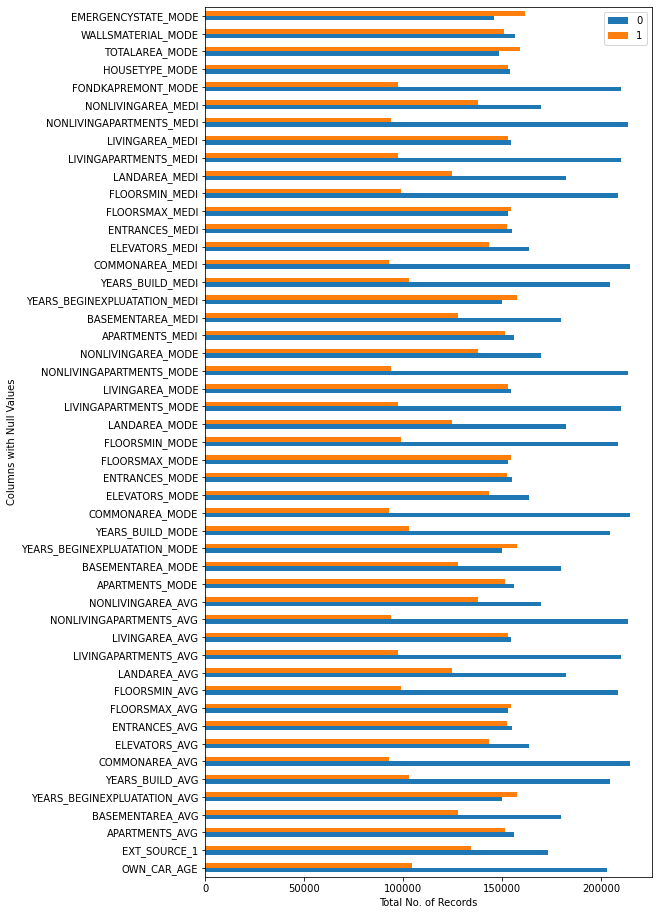

In [26]:
a.T.plot.barh(figsize=[8,16])
plt.xlabel("Total No. of Records")
plt.ylabel("Columns with Null Values")
plt.show()

##### Inference : The above chart is build on columns that are expected to be deleted since the null values are greater than 45% of the total volumne. The above graphs gives us a clear view where the non null values are less than null values in most of the cases. Orange = 1 = Non nulls and Blue = 0 = Nulls in columns specified on y axis for application file

#### C.Dropping Columns with null greater than 45% in Application File

In [27]:
New_app=app.drop(delcol,axis=1)

In [28]:
New_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.Imputing Nulls with relevant value for columns having null 0 - 45% of total volumne in Application File

#### A. Find out columns having nulls in Application File 

In [29]:
a=New_app.columns[New_app.isnull().sum() > 0].tolist()

In [30]:
len(a)

18

In [31]:
a

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [32]:
New_app[New_app.columns[((New_app.isnull().sum()/app.shape[0])*100)>0]]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,Laborers,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,Core staff,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,Laborers,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,Laborers,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,Core staff,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,Sales staff,1.0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,NaN,1.0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,29979.0,585000.0,Unaccompanied,Managers,1.0,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,20205.0,319500.0,Unaccompanied,Laborers,2.0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


#### B. Find out the relevant imputing values for each column having nulls in Application File

##### Since Box plot is the best way to find out if the columns containing nulls have outliers or not - the box plots for the column which would require value imputation are built below

<AxesSubplot:xlabel='EXT_SOURCE_2'>

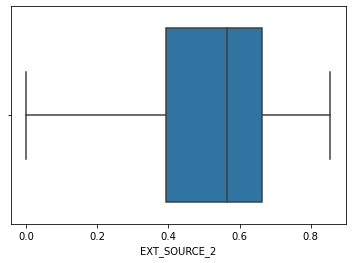

In [33]:
sns.boxplot(x=New_app["EXT_SOURCE_2"])

<AxesSubplot:xlabel='EXT_SOURCE_3'>

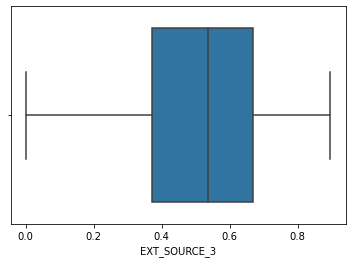

In [34]:
sns.boxplot(x=New_app["EXT_SOURCE_3"])

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

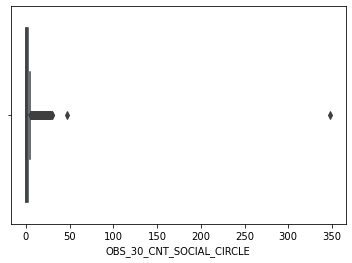

In [35]:
sns.boxplot(x=New_app['OBS_30_CNT_SOCIAL_CIRCLE'])

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

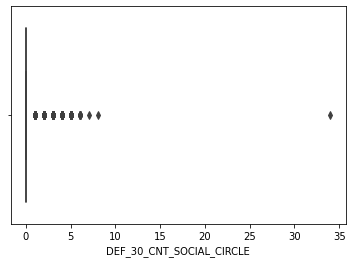

In [36]:
sns.boxplot(x=New_app['DEF_30_CNT_SOCIAL_CIRCLE'])

<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE'>

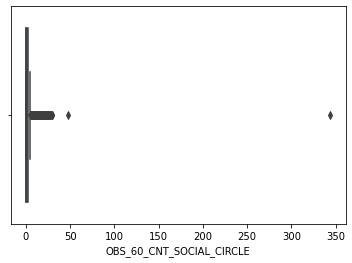

In [37]:
sns.boxplot(x=New_app['OBS_60_CNT_SOCIAL_CIRCLE'])

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE'>

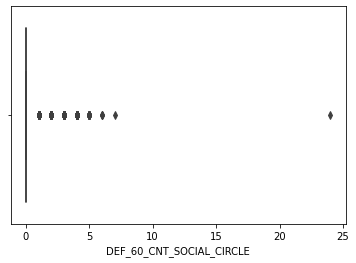

In [38]:
sns.boxplot(x=New_app['DEF_60_CNT_SOCIAL_CIRCLE'])

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

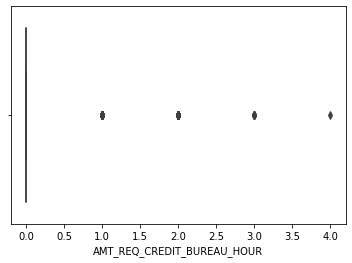

In [39]:
sns.boxplot(x=New_app["AMT_REQ_CREDIT_BUREAU_HOUR"])

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_DAY'>

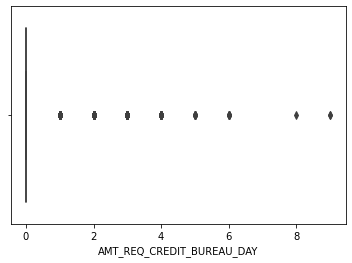

In [40]:
sns.boxplot(x=New_app["AMT_REQ_CREDIT_BUREAU_DAY"])

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

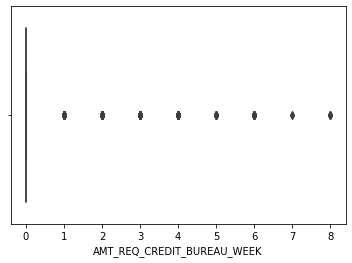

In [41]:
sns.boxplot(x=New_app["AMT_REQ_CREDIT_BUREAU_WEEK"])

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_MON'>

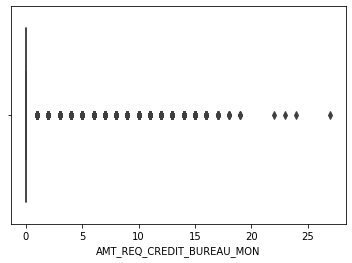

In [42]:
sns.boxplot(x=New_app["AMT_REQ_CREDIT_BUREAU_MON"])

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_QRT'>

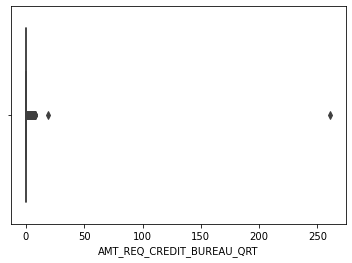

In [43]:
sns.boxplot(x=New_app["AMT_REQ_CREDIT_BUREAU_QRT"])

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

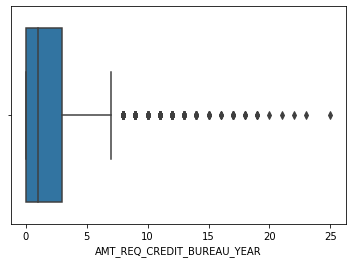

In [44]:
sns.boxplot(x=New_app["AMT_REQ_CREDIT_BUREAU_YEAR"])

In [45]:
New_app[New_app.columns[New_app.isnull().sum() > 0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_ANNUITY                 307499 non-null  float64
 1   AMT_GOODS_PRICE             307233 non-null  float64
 2   NAME_TYPE_SUITE             306219 non-null  object 
 3   OCCUPATION_TYPE             211120 non-null  object 
 4   CNT_FAM_MEMBERS             307509 non-null  float64
 5   EXT_SOURCE_2                306851 non-null  float64
 6   EXT_SOURCE_3                246546 non-null  float64
 7   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 9   OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 10  DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 11  DAYS_LAST_PHONE_CHANGE      307510 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 13  AMT_REQ_CREDIT

In [46]:
a

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

##### As this is big dataset - we cannot be hrad coding to write one statemnt for each column top impute values - we have builtr an easier, faster and dynamic way to find out what is the imputation required and finally do the imputation

In [47]:
MissingInput={}

In [48]:
 for item in a:
    if (New_app[item].dtypes == 'float64' or New_app[item].dtypes == 'int32' or New_app[item].dtypes == 'int64' ):
        q1=New_app[item].describe()[4]
        q3=New_app[item].describe()[6]
        iqr=q3-q1
        lb=q1-(1.5*iqr)
        ub=q3+(1.5*iqr)
        HasOutlier=np.where((New_app[item]>ub).sum() or (New_app[item]<lb).sum(),1,0)
        if(HasOutlier.tolist()==1):
            MissingInput[item]="Median"
        elif(HasOutlier.tolist()==0):
            MissingInput[item]="Mean"
    else:
        MissingInput[item]="Missing"

##### It has been suggested in a no. of studies that for categorical columns we should be using Mode - but we have not done that here as per the industry experience I hold. There is always a requirement by the end user / client / stakeholder to understand what was missing rather than mixing it with the actual mode value and never finding out the nulls to fix in data from the source. Thus we use value "Missing" in categorical Columns

##### If there is an outlier in numerical column we have prefered to use median and if there are no outlier we are using mean

In [49]:
MissingInput

{'AMT_ANNUITY': 'Median',
 'AMT_GOODS_PRICE': 'Median',
 'NAME_TYPE_SUITE': 'Missing',
 'OCCUPATION_TYPE': 'Missing',
 'CNT_FAM_MEMBERS': 'Median',
 'EXT_SOURCE_2': 'Mean',
 'EXT_SOURCE_3': 'Mean',
 'OBS_30_CNT_SOCIAL_CIRCLE': 'Median',
 'DEF_30_CNT_SOCIAL_CIRCLE': 'Median',
 'OBS_60_CNT_SOCIAL_CIRCLE': 'Median',
 'DEF_60_CNT_SOCIAL_CIRCLE': 'Median',
 'DAYS_LAST_PHONE_CHANGE': 'Median',
 'AMT_REQ_CREDIT_BUREAU_HOUR': 'Median',
 'AMT_REQ_CREDIT_BUREAU_DAY': 'Median',
 'AMT_REQ_CREDIT_BUREAU_WEEK': 'Median',
 'AMT_REQ_CREDIT_BUREAU_MON': 'Median',
 'AMT_REQ_CREDIT_BUREAU_QRT': 'Median',
 'AMT_REQ_CREDIT_BUREAU_YEAR': 'Median'}

#### C. Impute the relevant values for columns containing nulls in Application File

In [50]:
for key in MissingInput : 
    if (MissingInput[key]=='Missing'):
        New_app[key]=New_app[key].fillna("Missing")
    elif(MissingInput[key]=='Mean'):
        New_app[key]=New_app[key].fillna(New_app[key].mean())
    elif(MissingInput[key]=='Median'):
        New_app[key]=New_app[key].fillna(New_app[key].median())

In [51]:
New_app.EXT_SOURCE_2.value_counts()

0.285898    721
0.514393    660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64

#### D.Verify that there are no null values after imputation in Application File

In [52]:
New_app[New_app.columns[((New_app.isnull().sum()/app.shape[0])*100)>0]]

""
0
1
2
3
4
...
307506
307507
307508
307509


In [53]:
New_app.columns[New_app.isnull().sum()>0]

Index([], dtype='object')

## 3. Handling Nulls in Previous Application File

#### A.Dropping Columns with null greater than 45% in Previous Application File

In [57]:
New_papp=papp.drop(delcol_prev,axis=1)

In [58]:
New_papp.shape

(1670214, 33)

In [59]:
papp.isnull().sum()>0

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                     True
AMT_APPLICATION                False
AMT_CREDIT                      True
AMT_DOWN_PAYMENT                True
AMT_GOODS_PRICE                 True
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
RATE_DOWN_PAYMENT               True
RATE_INTEREST_PRIMARY           True
RATE_INTEREST_PRIVILEGED        True
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                 True
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
N

## 4.Imputing Nulls with relevant value for columns having null 0 - 45% of total volumne in Previous Application File

#### A. Find out columns having nulls in Previous Application File

In [60]:
a_papp=New_papp.columns[New_papp.isnull().sum() > 0].tolist()

In [61]:
a_papp

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

#### B.Find out the relevent imputing values for each column having nulls in Previous Application File

In [62]:
MissingInput_papp={}

In [63]:
 for item in a_papp:
    if (New_papp[item].dtypes == 'float64' or New_papp[item].dtypes == 'int32' or New_papp[item].dtypes == 'int64' ):
        q1=New_papp[item].describe()[4]
        q3=New_papp[item].describe()[6]
        iqr=q3-q1
        lb=q1-(1.5*iqr)
        ub=q3+(1.5*iqr)
        HasOutlier1=np.where((New_papp[item]>ub).sum() or (New_papp[item]<lb).sum(),1,0)
        if(HasOutlier.tolist()==1):
            MissingInput_papp[item]="Median"
        elif(HasOutlier.tolist()==0):
            MissingInput_papp[item]="Mean"
    else:
        MissingInput_papp[item]="Missing"

In [64]:
MissingInput_papp

{'AMT_ANNUITY': 'Median',
 'AMT_CREDIT': 'Median',
 'AMT_GOODS_PRICE': 'Median',
 'NAME_TYPE_SUITE': 'Missing',
 'CNT_PAYMENT': 'Median',
 'PRODUCT_COMBINATION': 'Missing',
 'DAYS_FIRST_DRAWING': 'Median',
 'DAYS_FIRST_DUE': 'Median',
 'DAYS_LAST_DUE_1ST_VERSION': 'Median',
 'DAYS_LAST_DUE': 'Median',
 'DAYS_TERMINATION': 'Median',
 'NFLAG_INSURED_ON_APPROVAL': 'Median'}

#### C. Impute the relevant values for columns containing nulls in Previous Application File

In [65]:
for key in MissingInput_papp : 
    if (MissingInput_papp[key]=='Missing'):
        New_papp[key]=New_papp[key].fillna("Missing")
    elif(MissingInput_papp[key]=='Mean'):
        New_papp[key]=New_papp[key].fillna(New_papp[key].mean())
    elif(MissingInput_papp[key]=='Median'):
        New_papp[key]=New_papp[key].fillna(New_papp[key].median())

#### D.Verify that there are no null values after imputation in Previous Application File

In [66]:
New_papp.isnull().sum()>0

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                    False
AMT_APPLICATION                False
AMT_CREDIT                     False
AMT_GOODS_PRICE                False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                False
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY           False
CNT_PAYMENT                    False
NAME_YIELD_GROUP               False
PRODUCT_COMBINATION            False
D

## 5. Some operations on data files for better visualisations

In [67]:
New_app['AGE']=abs(New_app['DAYS_BIRTH'])//365.25
New_app['AGE'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [68]:
New_app['AGE_GROUP'] = pd.cut(New_app['AGE'],bins=np.arange(20,71,5))

In [69]:
New_app['DAYS_EMPLOYED'] = abs(New_app['DAYS_EMPLOYED'])

In [70]:
New_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,67724.742149,...,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.405137
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,...,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.945779
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000


# Data Analysis

## 1. Checking for imbalance in Target in Application file

In [71]:
checkStatus = New_app["TARGET"].value_counts().reset_index()
checkStatus

,index,TARGET
0,0,282686
1,1,24825


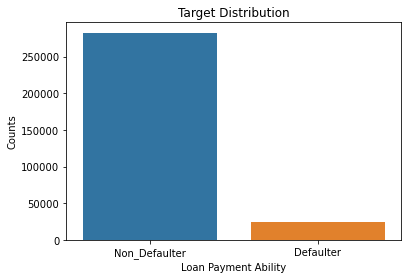

In [72]:
x= ['Non_Defaulter','Defaulter']
sns.barplot(x,"TARGET",data = checkStatus)
plt.xlabel("Loan Payment Ability")
plt.ylabel("Counts")
plt.title("Target Distribution")
plt.show()

## 2. Moving Defaulter and Non -Defaulter to different data frame in Application File

In [73]:
Non_Defaulter=New_app[New_app["TARGET"]==0]
Defaulter=New_app[New_app["TARGET"]==1]

## 3. Data Visuals to conclude the Loan Lendings

### 1. Traget Percentage

Precentage of Non Defaulters 91.93
Precentage of Defaulters 8.07


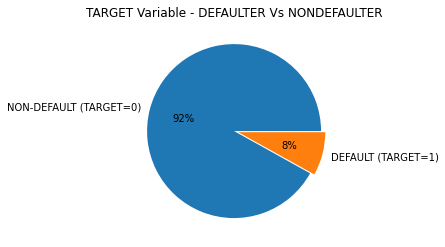

In [74]:
plt.pie(New_app['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
print("Precentage of Non Defaulters",round((Non_Defaulter.shape[0]/ (Non_Defaulter.shape[0]+Defaulter.shape[0]) ) *100,2))
print("Precentage of Defaulters",round((Defaulter.shape[0]/ (Non_Defaulter.shape[0]+Defaulter.shape[0]) ) *100,2))

plt.show()

### Inference : In the application file dataset - there are 92% apllicants who are non defaulters and 8% of applicants are defaulters

### 2. Univariant Analysis

#### A. Univariant Catogorical Analysis

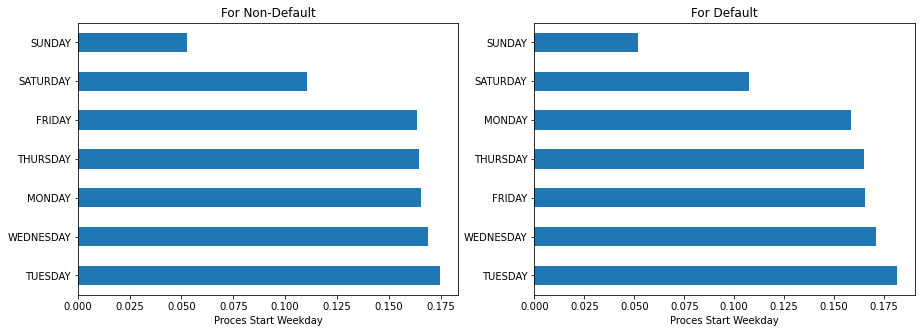

In [75]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
Non_Defaulter.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh()
plt.title('For Non-Default')
plt.xlabel('Proces Start Weekday')

plt.subplot(1,2,2)

Defaulter.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh()
plt.title('For Default')
plt.xlabel('Proces Start Weekday')
plt.show()


### Inference : From the above graph we can conclude that application starting processes are generally less in saturday and sunday

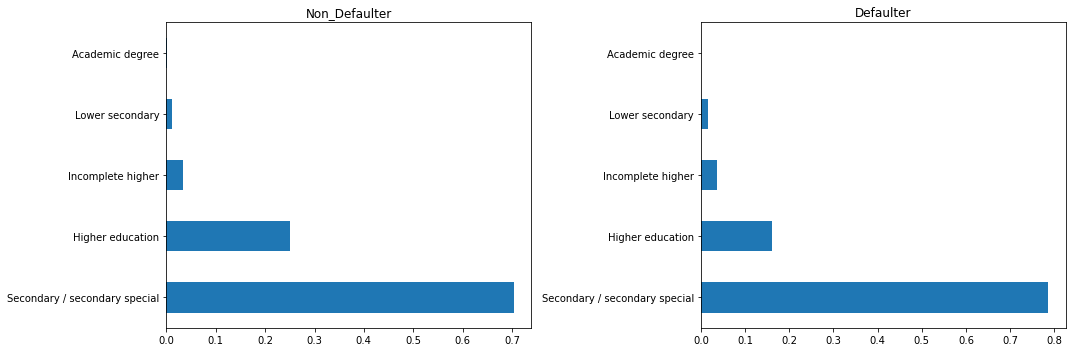

In [76]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
Non_Defaulter.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.tight_layout()
plt.title('Non_Defaulter')

plt.subplot(1,2,2)

Defaulter.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.tight_layout()
plt.title('Defaulter')
plt.show()



### Inference : From the plot above : We can conclude that secondary/special educated people are applying loans high in number. Academic degree educated people are applying loan in least count.

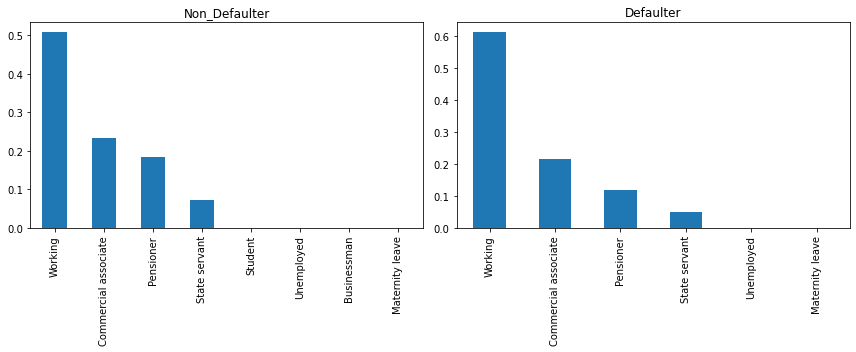

In [77]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
Non_Defaulter.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.tight_layout()
plt.title('Non_Defaulter')

plt.subplot(1,2,2)


Defaulter.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Defaulter')
plt.tight_layout()
plt.show()


### Inference : From the plot above :We can notice that the students don't default. The reason could be they are not required to pay during the time they are students. We can also see that the Business Men never default. Most of the loans are distributed to working class people. We also see that working class people contribute ~50% to non defaulters while they contribute to ~60% of the defaulters.Thus, the chances of defaulting are more in working class case.

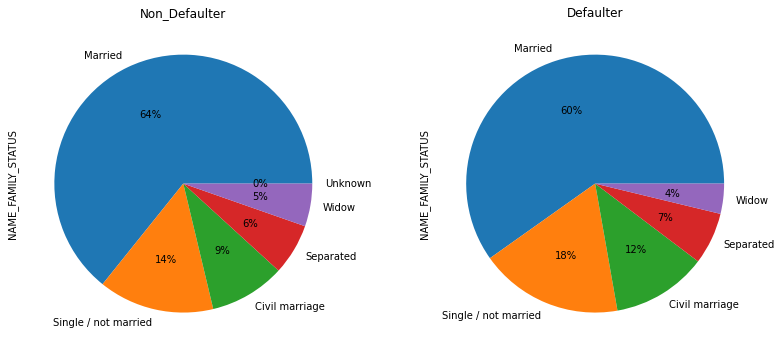

In [78]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
Non_Defaulter.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.f%%')
plt.tight_layout()
plt.title('Non_Defaulter')

plt.subplot(1,2,2)

Defaulter.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.f%%')
plt.title('Defaulter')
plt.tight_layout()
plt.show()


### Inference : The order of both defaulter and not defaulter customers is same i.e., Married,Single/not married,civil marriage,seperated,widow. It also shows that there exists few(1 or 2) unknown values in not default client family status.We can say more married people tend to take more Loan as compaired to other categories and being married is not impacting default and not defaulting. We can see that Single/Not Maried, Civil Marriage applicants have defaulted more.

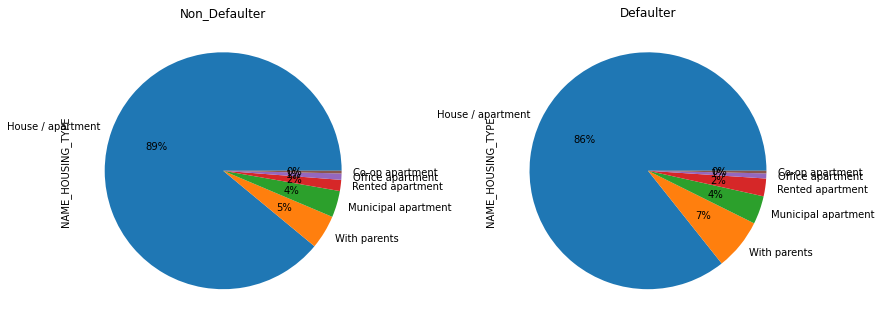

In [79]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
Non_Defaulter.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.pie(autopct='%1.f%%')
plt.tight_layout()
plt.title('Non_Defaulter')

plt.subplot(1,2,2)

Defaulter.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.pie(autopct='%1.f%%')
plt.title('Defaulter')
plt.tight_layout()
plt.show()

### Inference : The order of both defaulter and not defaulter customers is same i.e. House/Apartment, With Parents, Municipal, Rented, Officer, Co-Op Apartment. Applicants living in last 4 categopry do not infer any information here since the measure is same. While we see applicant living in House / Apartment are more in non defaulters than defaulters, though they vary with less percentage. But since the we saw in 1st pie chat that 92% is non defaulter - so 89% of 92% is a good number to say Housing  / Appartment are very less likely to default.

In [80]:
New_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

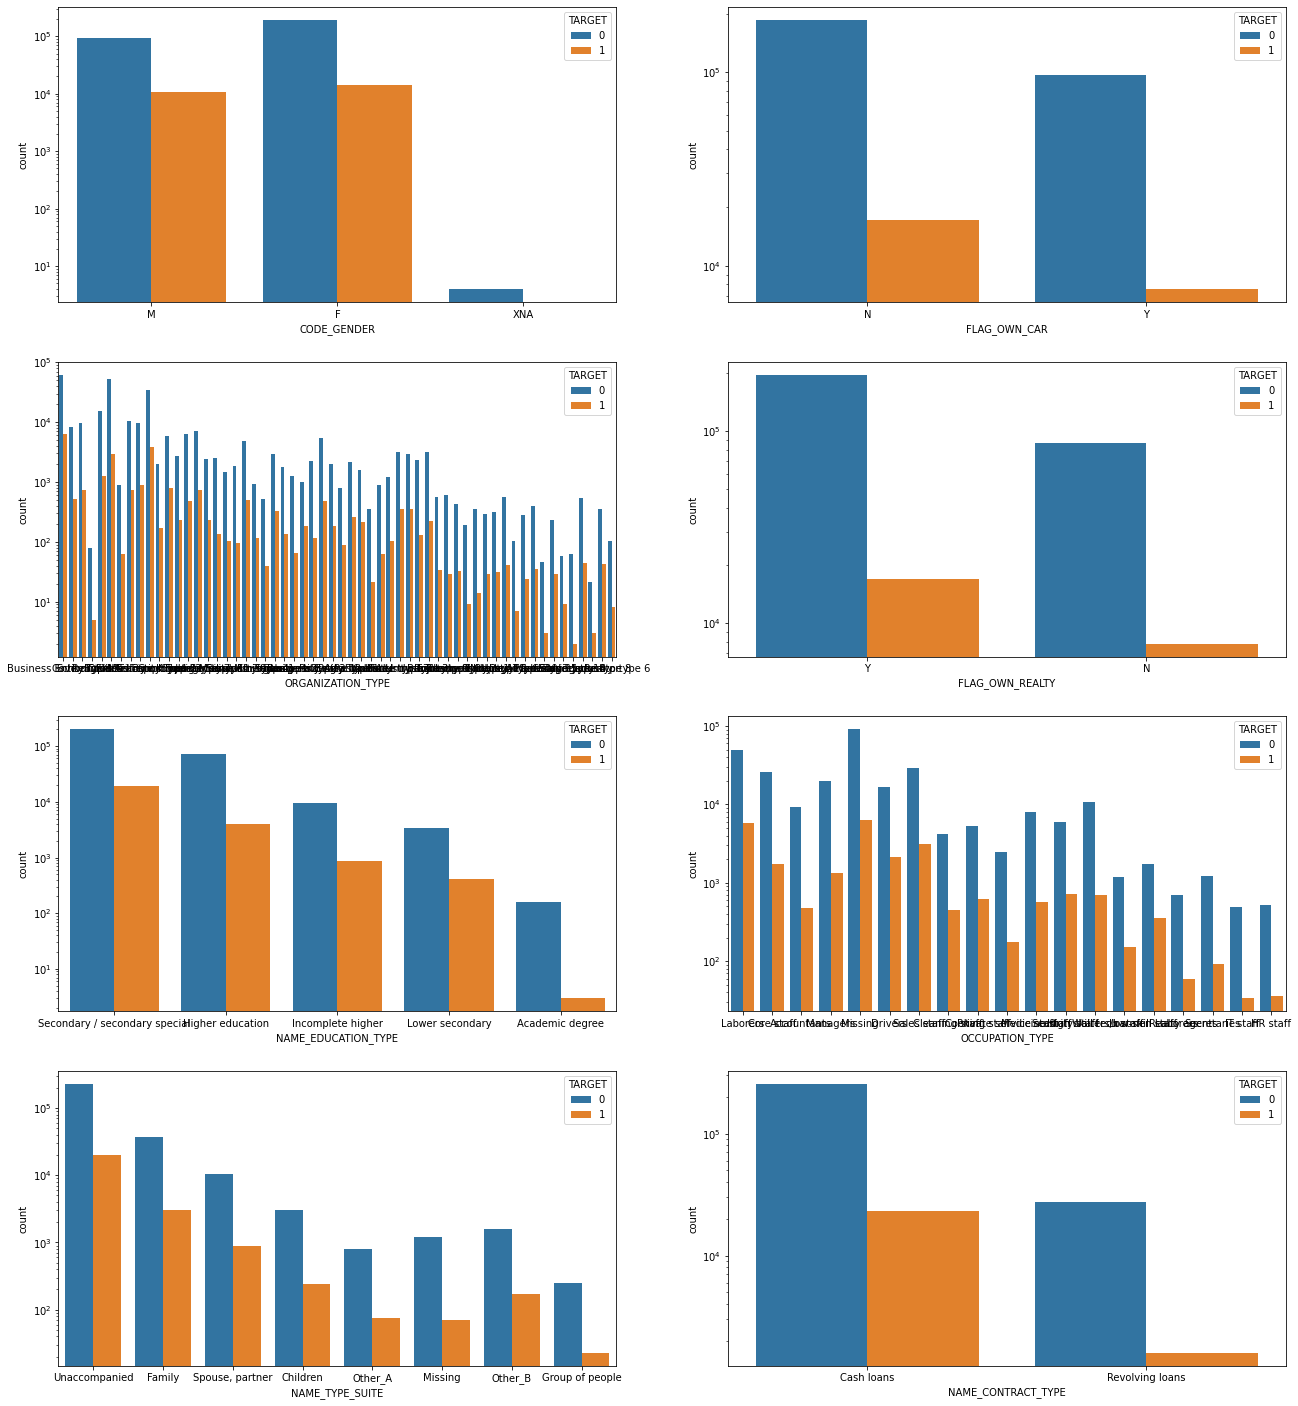

In [81]:
Dimension_columns=['CODE_GENDER','FLAG_OWN_CAR','ORGANIZATION_TYPE','FLAG_OWN_REALTY',
                     'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_TYPE_SUITE',
                    'NAME_CONTRACT_TYPE']
plt.figure(figsize=(22,25))
for i in (enumerate(Dimension_columns)):
    plt.subplot(len(Dimension_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=New_app)
    plt.yscale('log')
plt.show()

### Inference from the above graphs :Male not defaulting is similar to Women but Women default more than Men. People who don't own a car tends to take more loans. People tend to take more cash loans, and default percentage of revolving loans is less. People with real estate tends to take more loans. People who are not accompanied with anyone tend to take more loans. We can conclude that secondary/special educated people are applying loans in high in number.

#### B. Univariant Continous/ Numerical Analysis

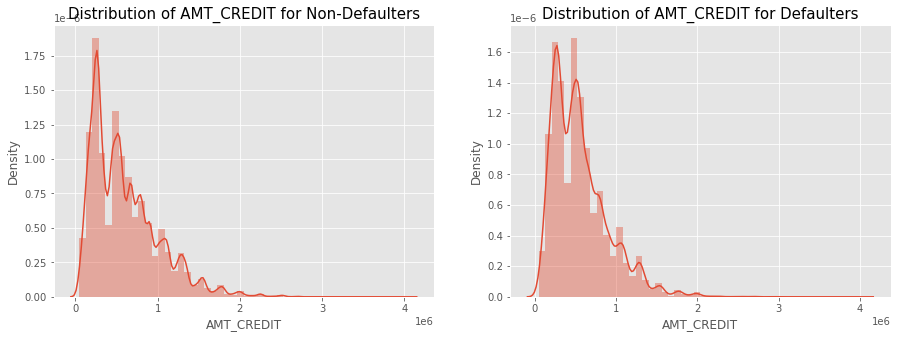

In [82]:
plt.style.use('ggplot')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))



sns.distplot(a= Non_Defaulter['AMT_CREDIT'],ax=ax1)
ax1.set_title(f'Distribution of AMT_CREDIT for Non-Defaulters',fontsize=15)
            
sns.distplot(a=Defaulter['AMT_CREDIT'],ax=ax2)
ax2.set_title(f'Distribution of AMT_CREDIT for Defaulters',fontsize=15)    
        
plt.show()

### Inference from the above graphs : Although there doesn't seem to be a clear distiguish between the group which defaulted vs the group which didn't but, we can see that when the AMT_CREDIT is more than 50, people default.

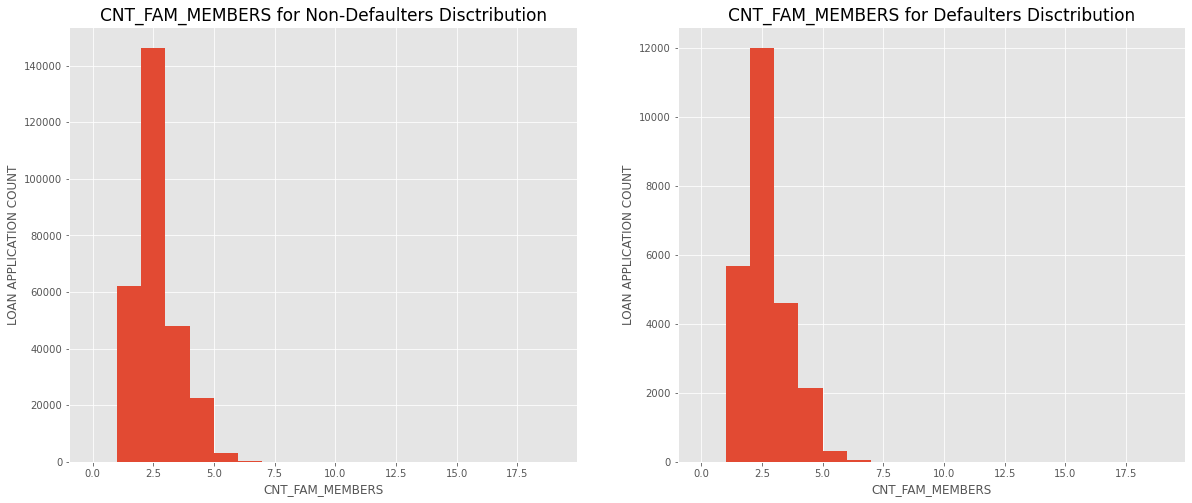

In [83]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
Non_Defaulter['CNT_FAM_MEMBERS'].plot.hist(bins=range(20))
plt.title('CNT_FAM_MEMBERS for Non-Defaulters Disctribution',fontsize=17)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
Defaulter['CNT_FAM_MEMBERS'].plot.hist(bins=range(20))
plt.title(f'CNT_FAM_MEMBERS for Defaulters Disctribution',fontsize=17)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

### Inference from the above graphs :We can see that a family of 3 applies loan more often than the other families

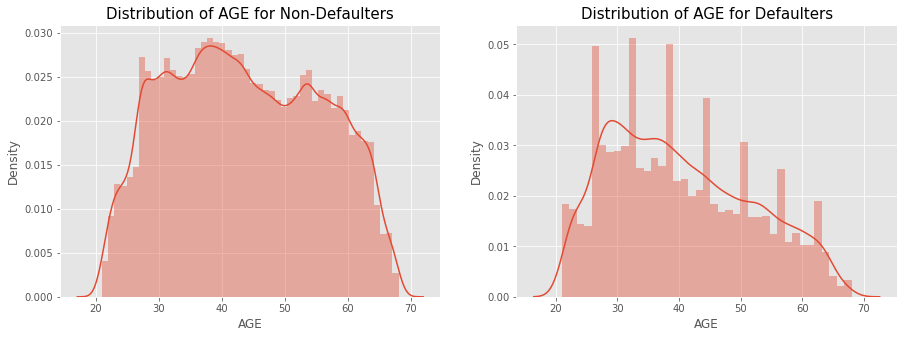

In [84]:
plt.style.use('ggplot')
sns.despine

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
sns.distplot(a= Non_Defaulter['AGE'],ax=ax1)
ax1.set_title(f'Distribution of AGE for Non-Defaulters',fontsize=15)
            
sns.distplot(a=Defaulter['AGE'],ax=ax2)
ax2.set_title(f'Distribution of AGE for Defaulters',fontsize=15)    
        
plt.show()

### Inference from the above graphs : People are more likely to default when they are in their mid age like 25-26,34-35,45,55-46. With the increase in age the defaulting behaviour of people decreases i.e. with the higher age has less defaulters

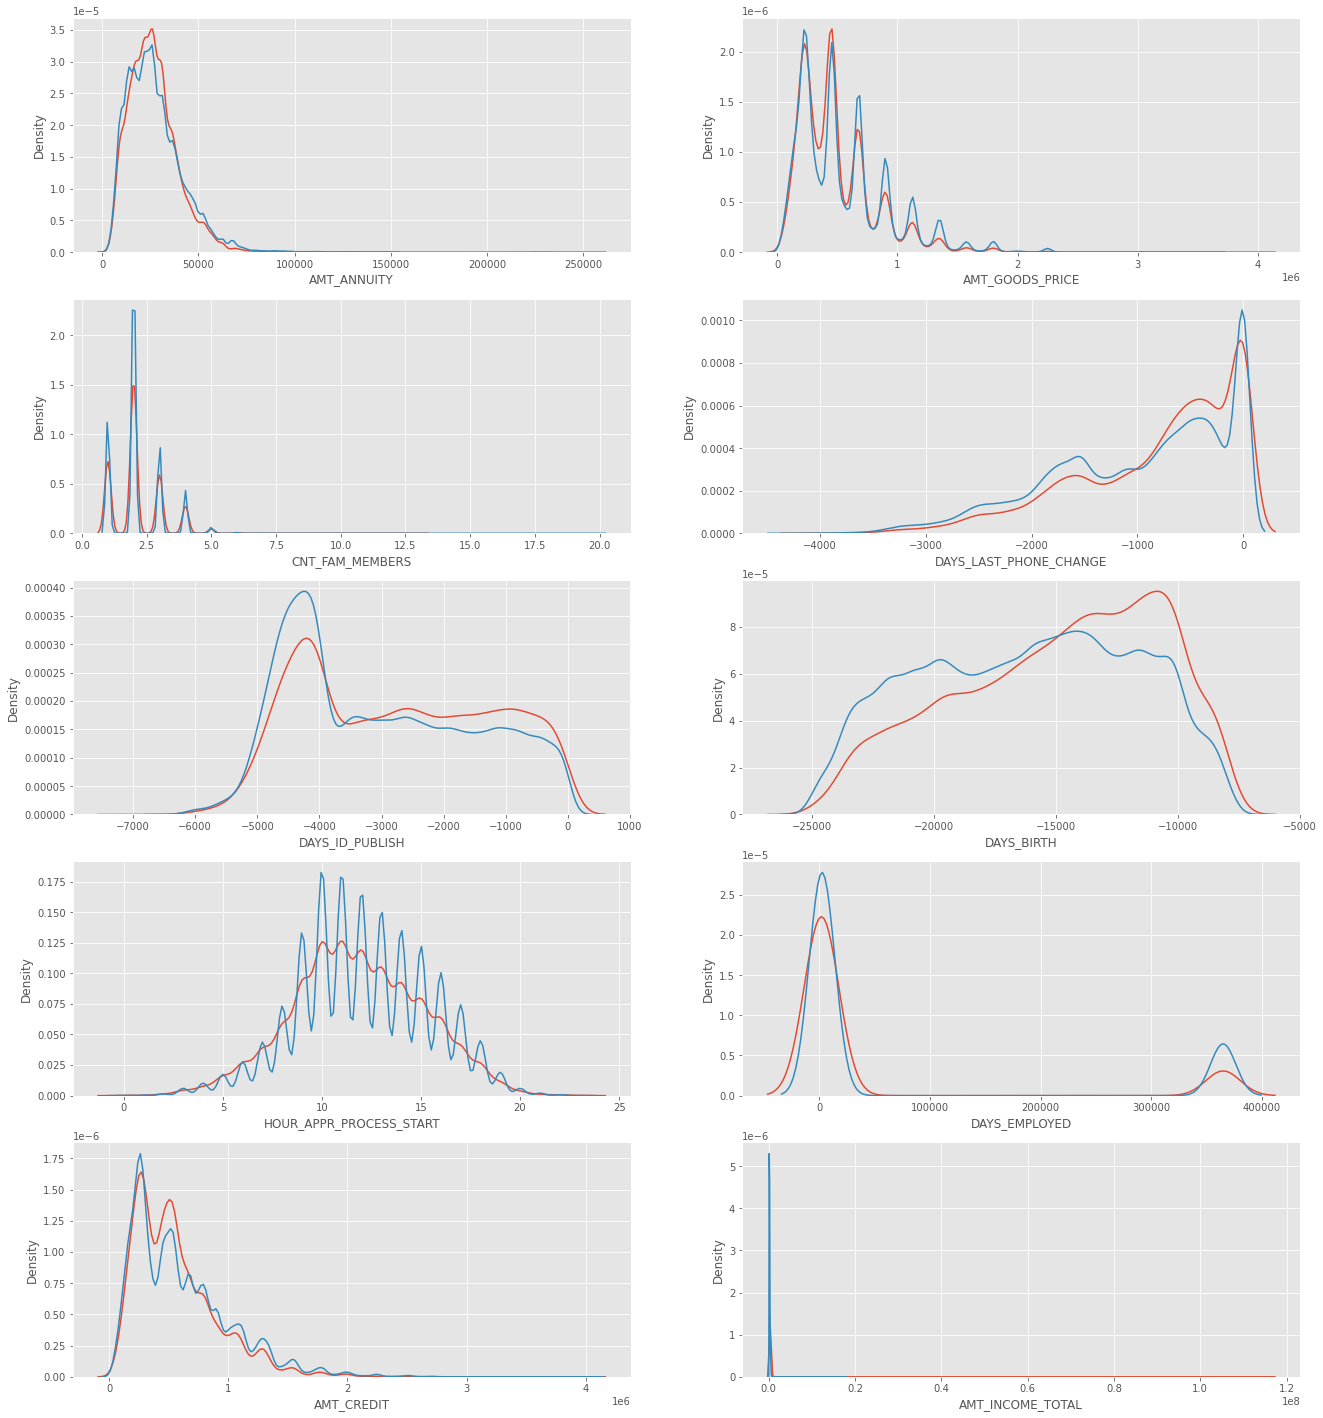

In [85]:
numeric_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i in (enumerate(numeric_columns)):
    plt.subplot(len(numeric_columns)//2,2,i[0]+1)
    sns.distplot(Defaulter[i[1]].dropna(),hist=False,label='Target : Defaulter')
    sns.distplot(Non_Defaulter[i[1]].dropna(),hist=False,label='Target : No Defaulter')
plt.show()

### Inference from the above graphs :People with lower total income are more likely to default. People who just got employed tends to take more loans. High number of applications are filed in 10 AM to 2 PM. People with age between 27yrs(10000-days) and 41(15000-days) yrs tend to take more loans. People whose id(s) got published between 4000 days and 5000 days ago tend to take more loans. Nuclear family tends to take more loans. Most no of loans are given for goods price below 10 lakhs. Credit amount of the loan is mostly less then 10 lakhs. The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

### 3.Bi/Multi-Variant Analysis

#### A. Bi/Multi-Variate Categorical - Categorical Analysis

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143550  
1                      2982           1249        0           8    15224  


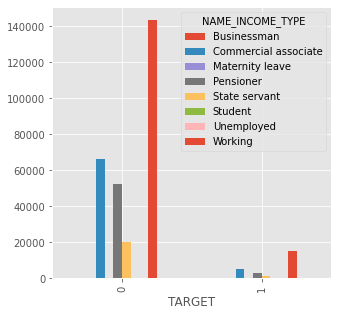

In [86]:
BiCAt1= pd.crosstab(index=New_app['TARGET'],columns=New_app['NAME_INCOME_TYPE'])
print(BiCAt1)
BiCAt1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

### Inference : Working people take more loans. Business Man, People on Maternity Leave take no loans at all. Students might take but they do not start to pay untill employed thus out of consideration. Similary Unemployed is out of consideration

CODE_GENDER       F      M  XNA
TARGET                         
0            188278  94404    4
1             14170  10655    0


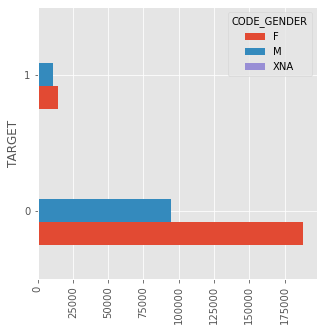

In [87]:
BiCAt2= pd.crosstab(index=New_app['TARGET'],columns=New_app['CODE_GENDER'])
print(BiCAt2)
BiCAt2.plot(kind="barh", figsize=(5,5),stacked=False)
plt.xticks(rotation=90)
plt.show()

### Inference : Females take more loans and Males default more

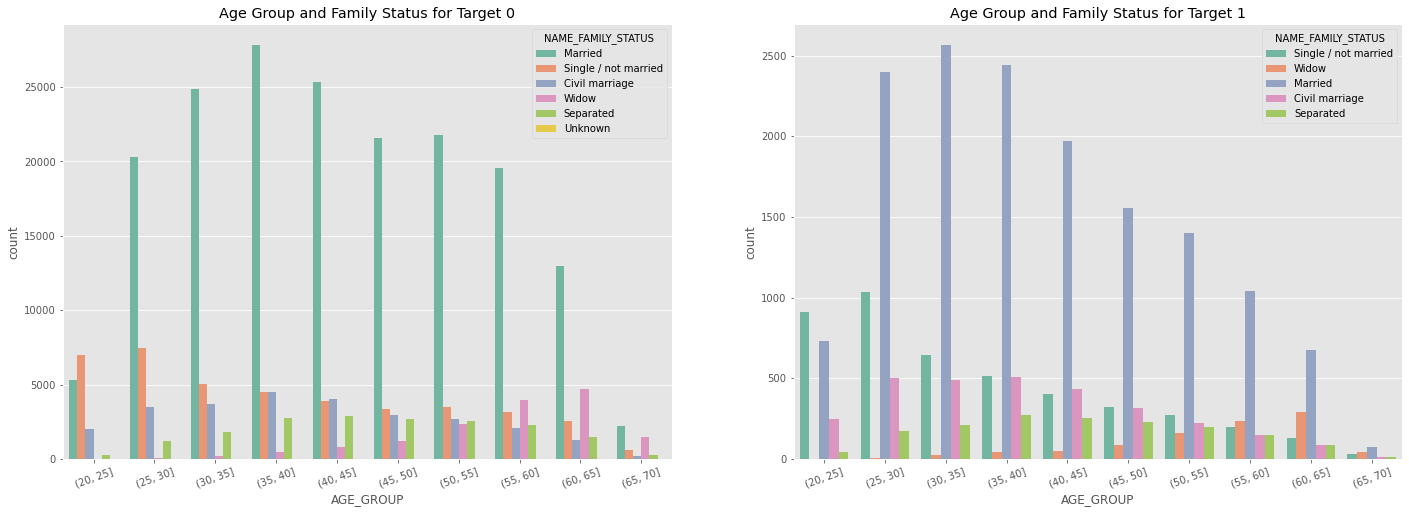

In [88]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Age Group and Family Status for Target 0")
sns.countplot('AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =Non_Defaulter, palette="Set2")
plt.xticks(rotation=20)
plt.subplot(1,2,2)
plt.title("Age Group and Family Status for Target 1")
sns.countplot('AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =Defaulter, palette="Set2")
plt.xticks(rotation=20)

plt.show()

### Inference: from the above graphs - Married applicant in the age group 25-35 and 35-45 is the largest group of applicant with payment difficulties

#### B. Bi/Multi-Variate Categorical - Numerical Analysis

In [89]:
New_app.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71617.0,202955.327289,147974.151536,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21703.0,179737.969506,100880.579748,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158774.0,163169.889223,307577.685942,25650.0,112500.0,135000.0,202500.0,117000000.0


<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='AMT_INCOME_TOTAL'>

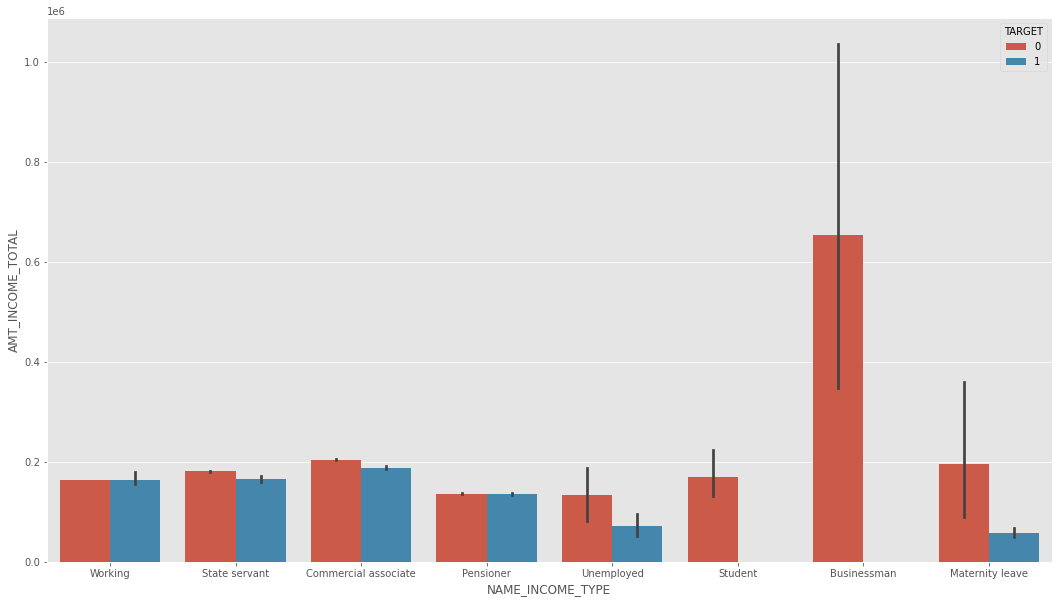

In [90]:
plt.figure(figsize=(18,10))
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=New_app, hue='TARGET') 

### Inferences: It can be seen that business man's income is the highest  and they do not default. Commercial Associate default maximum in the income type category. We cannot infer much on prisioner and working income type as they appear to default and not default in equal proportions

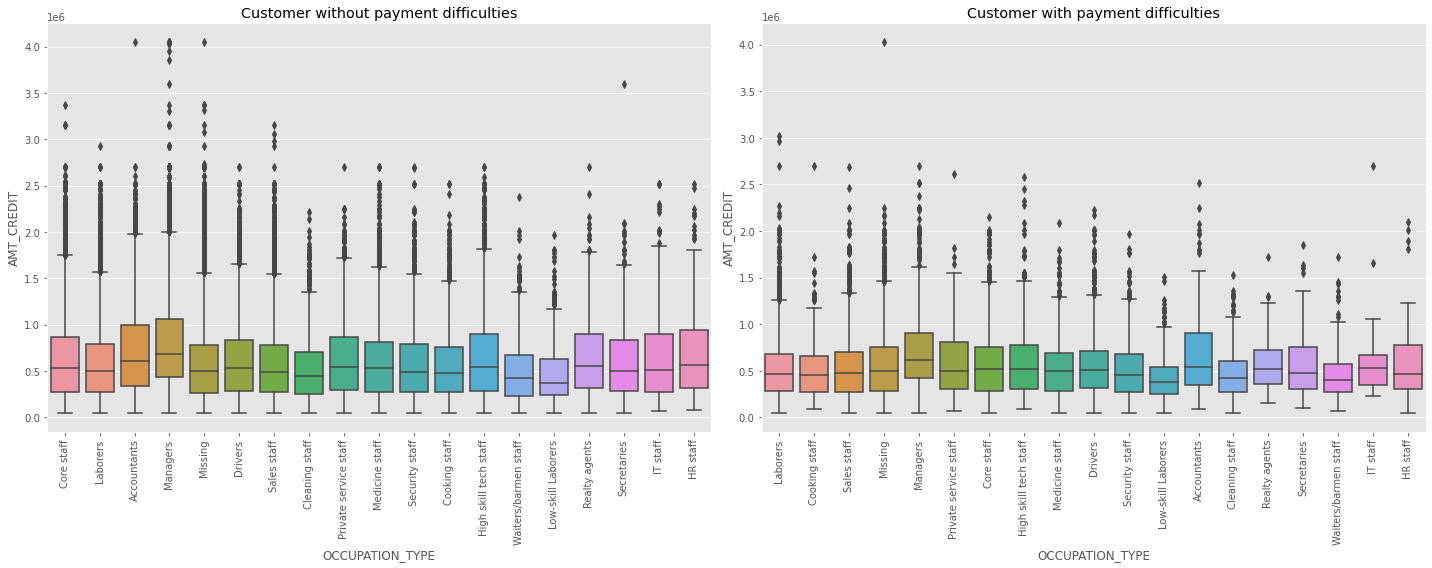

In [91]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=Non_Defaulter,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(data=Defaulter,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Inference : Here we can see that the range of the customers without payment difficulties (non defaulters) are more as compare to the customers with payment difficulties. We see that Occupation Type Accountants and Managers who have maximum Credit amount of the loan suffere from payment difficyulties

#### C. Bi/Multi-Variate Numerical - Numerical Analysis

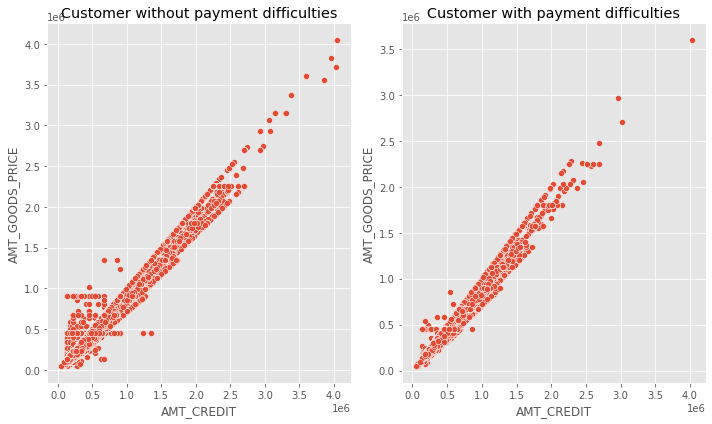

In [92]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=Non_Defaulter,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=Defaulter,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

### Inference : Here we can see that, positively correlated(goods price is positivey correlated to credit amount)


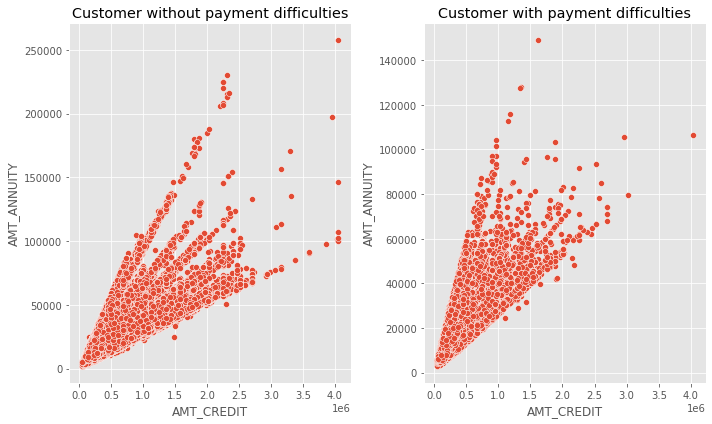

In [93]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=Non_Defaulter,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=Defaulter,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

### Inference: Here, We can conclude that, people with out payment difficulties take more credit for the annuity

### 4. Correlational Analysis

In [94]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [95]:
Non_Defaulter_corr_df = New_app.loc[New_app['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_corr_df = New_app.loc[New_app['TARGET']==1, cols_for_correlation] # Defaulters

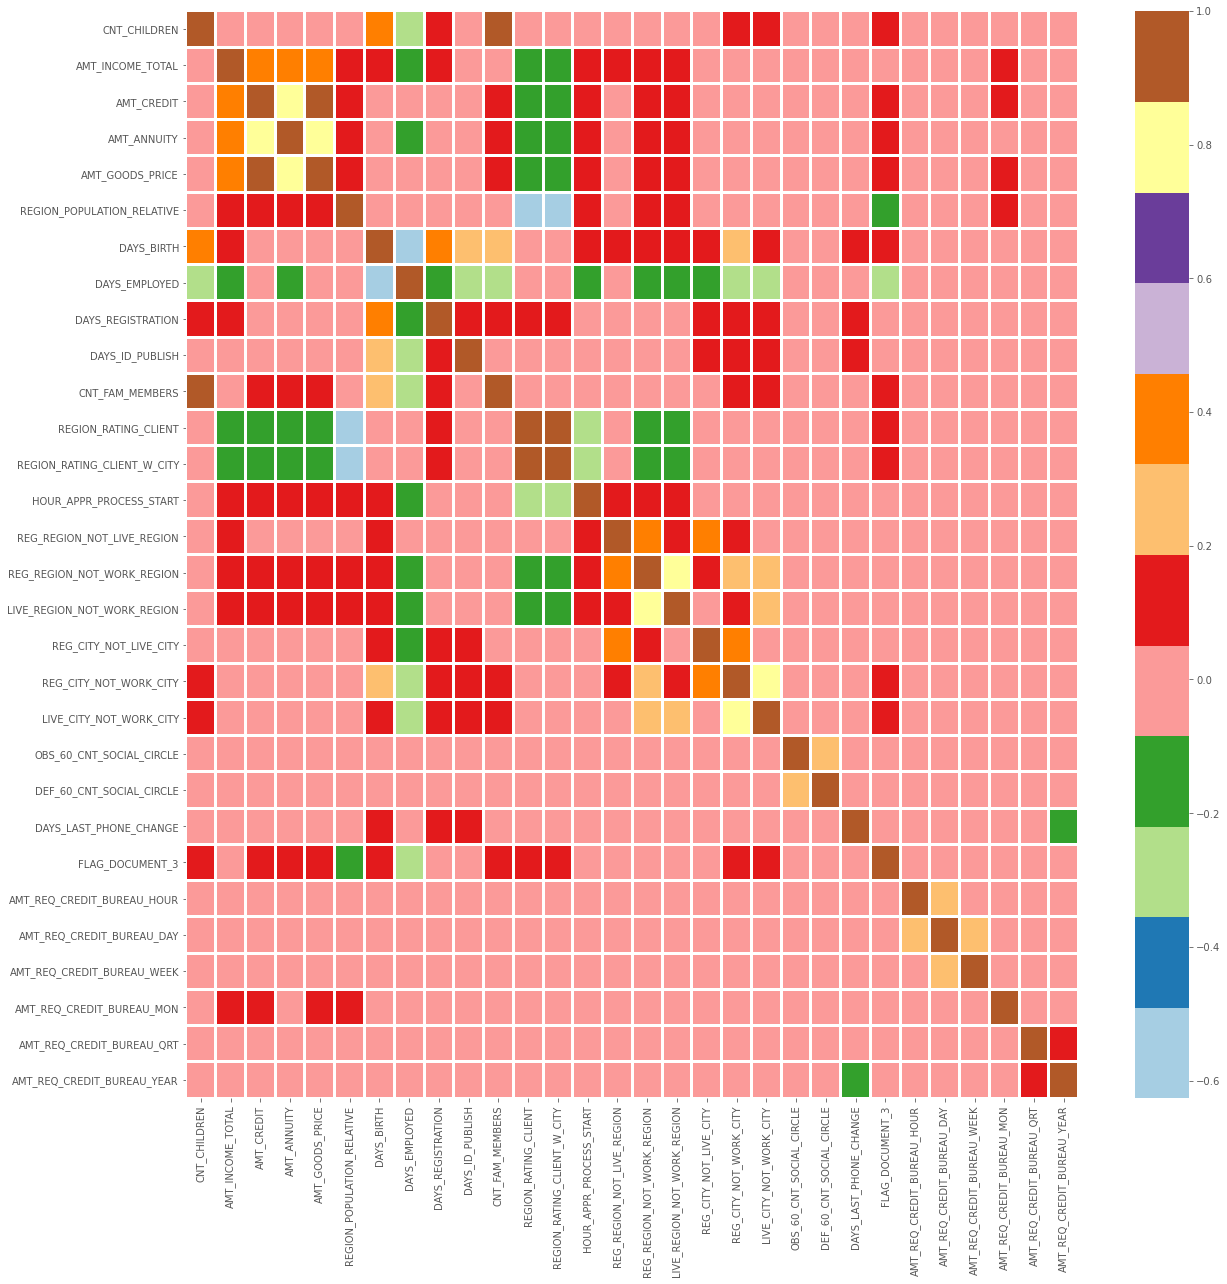

In [96]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(Non_Defaulter_corr_df.corr(), cmap="Paired",annot=False,linewidth =2)

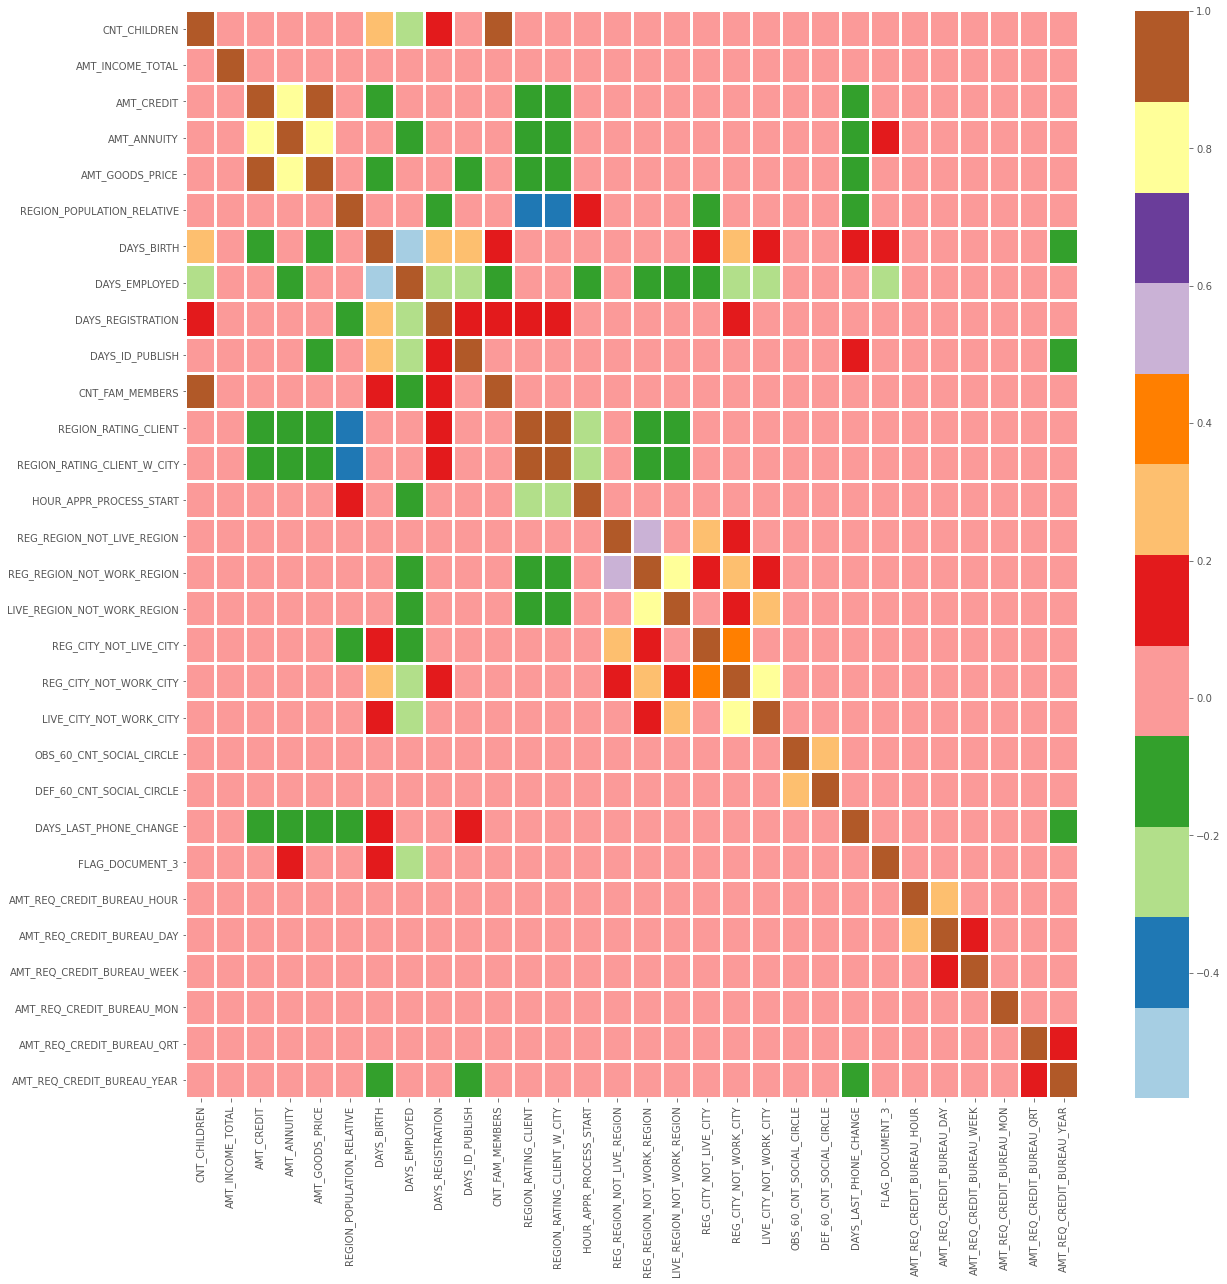

In [97]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(Defaulter_corr_df.corr(), cmap="Paired",annot=False,linewidth =2)

### Inference : Credit amount is highly correlated with amount of goods price which is same as repayers, But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77). We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

### 5. Join Previous Application Data and Current Application data

#### A. Joining the two cleaned data sets and evaluating results

In [98]:
Join = pd.merge(left=New_app,right=New_papp,how='inner',on='SK_ID_CURR')

In [99]:
Join.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


#### B. Data Visuals to gain insights to Loan Lending Data

In [100]:
Join['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

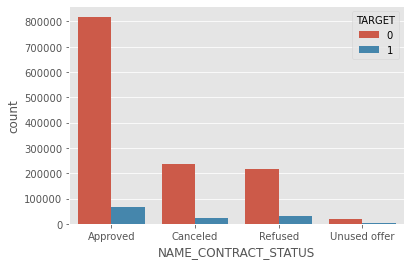

In [101]:
sns.countplot(x='NAME_CONTRACT_STATUS', data=Join,hue='TARGET', order=Join['NAME_CONTRACT_STATUS'].value_counts().index)

In [102]:
group = Join.groupby("NAME_CONTRACT_STATUS")["TARGET"]
Values = pd.concat([group.value_counts(),round(group.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
Values['Percentage'] = Values['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (Values)

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


### Inference :  90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients.88% of the clients who have been previously refused a loan has payed back the loan in current case.Refusal reason should be recorded for further analysis as these clients would turn into potential repaying customer

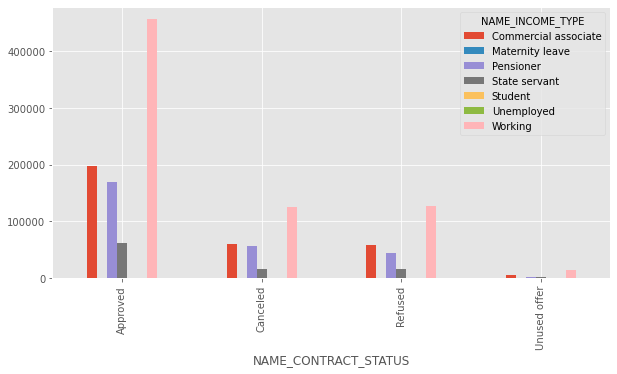

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                            198507               10     170144   
Canceled                             59785                2      57674   
Refused                              58117                3      43802   
Unused offer                          5072                1       1924   

NAME_INCOME_TYPE      State servant  Student  Unemployed  Working  
NAME_CONTRACT_STATUS                                               
Approved                      61630       20          68   455720  
Canceled                      15679        3          16   126282  
Refused                       15597        1          38   127832  
Unused offer                   1518        0           1    14255  


In [103]:
Ct= pd.crosstab(index=Join['NAME_CONTRACT_STATUS'],columns=Join['NAME_INCOME_TYPE'])
Ct.plot(kind="bar", figsize=(10,5),stacked=False)
plt.show()
print(Ct)

### Inference : Highest number of approvals for working applicant followed by state servant, But Working professional still remain high as there is a big difference.Maximum Refusal are for the unemployed. 

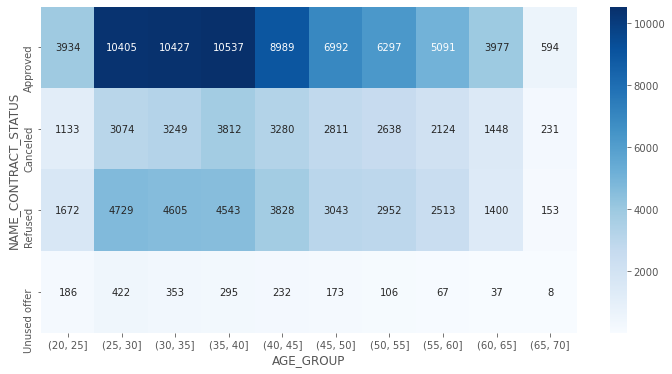

In [104]:
result=pd.pivot_table(data=Join,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

### Inference : maximum no. of approval are for age group 35-40. While most of the approved application are of people between Age 25 - 45. 

# Final Observation are mentioned in pdf please refer the pdf